In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
from pygments.styles.dracula import background
from sklearn.metrics import confusion_matrix

General Functions that are used throughout the code

In [4]:
def create_combined_mask(img_cyto, img_nuc):
    """Create a combined mask with cytoplasm (gray) and nucleus (white)."""
    combined_mask = np.zeros_like(img_cyto, dtype=np.uint8)
    combined_mask[img_cyto > 0] = 128  # Gray for cytoplasm
    combined_mask[img_nuc > 0] = 255   # White for nucleus
    return combined_mask

def dice_coefficient(mask1, mask2):
    """Compute the Dice coefficient between two binary masks."""
    intersection = np.sum((mask1 > 0) & (mask2 > 0))
    sum_masks = np.sum(mask1 > 0) + np.sum(mask2 > 0)
    return (2. * intersection) / sum_masks if sum_masks != 0 else 1.0

def connectivit_8(image, limit, padd_size):
    """Perform 8-connectivity labeling."""
    height, width = image.shape
    connect_8 = np.zeros((height, width), dtype=np.int32)
    eq_list = {}
    label = 1

    for i in range(padd_size, height - padd_size):
        for j in range(padd_size, width - padd_size):
            if 0 <= image[i, j] <= limit:
                neighbors = []
                if connect_8[i, j - padd_size] > 0:
                    neighbors.append(connect_8[i, j - padd_size])
                if connect_8[i - padd_size, j] > 0:
                    neighbors.append(connect_8[i - padd_size, j])
                if connect_8[i - padd_size, j - padd_size] > 0:
                    neighbors.append(connect_8[i - padd_size, j - padd_size])
                if connect_8[i - padd_size, j + padd_size] > 0:
                    neighbors.append(connect_8[i - padd_size, j + padd_size])
                if not neighbors:
                    connect_8[i, j] = label
                    eq_list[label] = label
                    label += 1
                else:
                    min_label = min(neighbors)
                    connect_8[i, j] = min_label
                    for neighbor in neighbors:
                        eq_list[neighbor] = min_label

    for i in range(height):
        for j in range(width):
            if connect_8[i, j] > 0:
                connect_8[i, j] = eq_list[connect_8[i, j]]
    return connect_8

Analysis on 1 Image

In [5]:
# Paths
image_path = "E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Open Lab with Instructions\\dataset\images\\render0001.png"
mask_path = "E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Open Lab with Instructions\\dataset\\masks\\clean0001.png"

def histogram(img):
    array = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = int(img[i, j])
            array[pixel_val] += 1
    array = np.array(array)
    return array

def compute_confusion_matrix(pred_mask, gt_mask):
    pred_flat = pred_mask.flatten()
    gt_flat = gt_mask.flatten()


    labels = [0, 128, 255]

    cm = confusion_matrix(gt_flat, pred_flat, labels=labels)
    return cm
def histogram(img):
    array = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = int(img[i, j])
            array[pixel_val] += 1
    array = np.array(array)
    return array



<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\Sikandar\AppData\Local\Temp\ipykernel_19020\2887653905.py:2: SyntaxWarning: invalid escape sequence '\i'
  image_path = "E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Open Lab with Instructions\\dataset\images\\render0001.png"


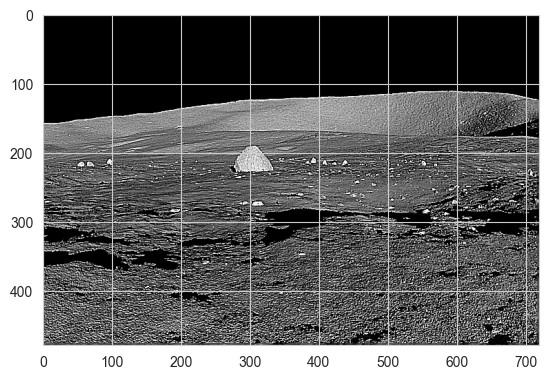

In [40]:
def laplacian(img):
    lap_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img, np.float64)

    for i in range(1, img.shape[0]-2):
      for j in range(1, img.shape[1]-2):
        window = padded_img[i-1:i+2, j-1:j+2]
        new_img[i-1, j-1] = np.sum(window * lap_filter)
    return new_img

lap_img = laplacian(img)
new_img = np.add(lap_img, img)
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)

plt.imshow(new_img, cmap='gray')


In [41]:
np.unique(new_img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

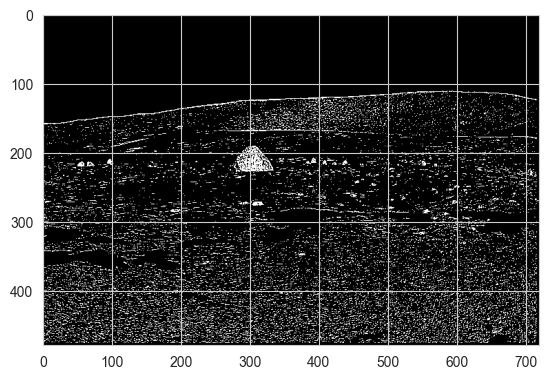

In [62]:
valid_pixels = np.zeros_like(new_img)
for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        if new_img[i,j]< 180:
            valid_pixels[i,j] = 0
        else:

            valid_pixels[i,j] = 255

plt.imshow(valid_pixels, cmap='gray')

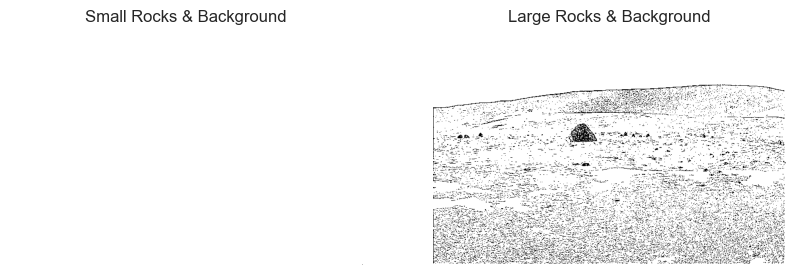

In [81]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



image =valid_pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)  # Convert to float32 for k-means

# Apply KMeans clustering
k = 3  # Background, small rocks, large rocks
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Reshape labels back to image shape
labels = labels.reshape(image.shape[:2])

# Create masks
mask_small_background = np.where(labels != labels.max(), 255, 0).astype(np.uint8)  # Small rocks + background
mask_large_background = np.where(labels != labels.min(), 255, 0).astype(np.uint8)  # Large rocks + background

# Display masks
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mask_small_background, cmap='gray')
plt.axis('off')
plt.title('Small Rocks & Background')

plt.subplot(1, 2, 2)
plt.imshow(mask_large_background, cmap='gray')
plt.axis('off')
plt.title('Large Rocks & Background')

plt.show()

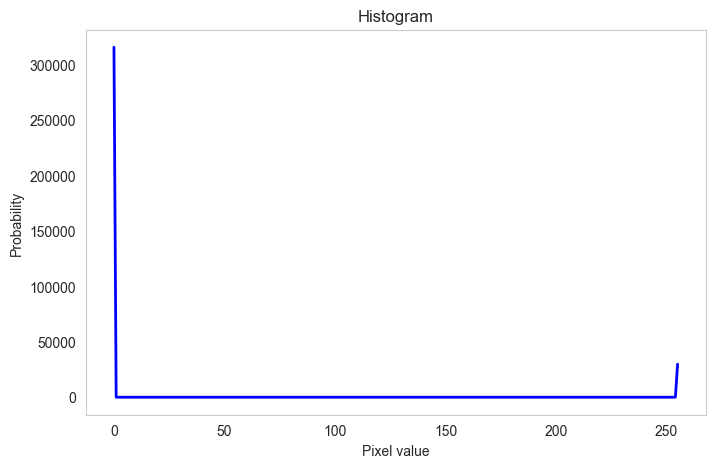

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Reshape the image into a 2D array of pixels
pixels = image.reshape((-1, 3))
pixels = np.float32(pixels)  # Convert to float32 for k-means

# Apply KMeans clustering
k = 3  # Background, small rocks, large rocks
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to uint8 and map labels to image
centers = np.uint8(centers)
segmented_image = centers[labels.flatten()].reshape(image.shape)

hist = histogram(valid_pixels)
plt.figure(figsize=(8, 5))
plt.plot(range(256), hist, color='blue', linewidth=2)
plt.title("Histogram")
plt.xlabel("Pixel value")
plt.ylabel("Probability")
plt.grid()
plt.show()

In [82]:
valid_pixels.shape

(480, 720)

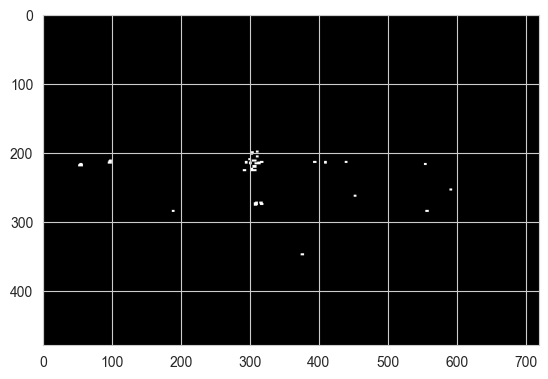

In [85]:

kernel = np.array([
    [1, 1, 1,1],
    [1, 1, 1,1],
    [1, 1, 1,1]
], dtype=np.uint8)

kernel2 = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

erosion_i = cv2.erode(image, kernel, iterations=1)
dilated_image = cv2.dilate(erosion_i, kernel, iterations=1)
plt.imshow(dilated_image, cmap='gray')

After seeing the histogram it is clearly visible the domainance of 255 as the most frequent Value

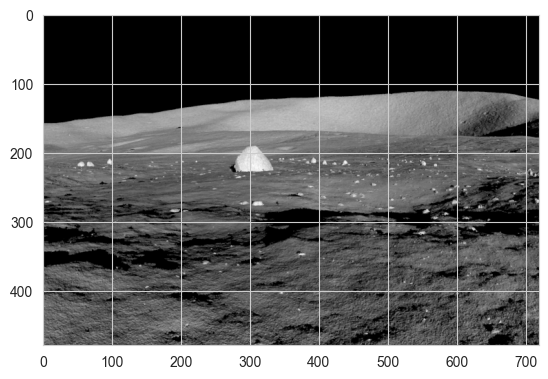

In [8]:
# Load images
original_image = cv2.imread(image_path, 0)
ground_truth_mask = cv2.imread(mask_path, 0)
plt.imshow()

In [13]:
np.unique(original_image)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [16]:

# Ensure images are loaded
if original_image is None or ground_truth_mask is None:
    raise FileNotFoundError("One or both files not found.")

# Compute thresholds
k1 = k2 = 1


valid_pixels = original_image[original_image != 0]
background_pixel = original_image[original_image == 0]
mean_intensity = np.mean(valid_pixels)
std_dev_intensity = np.std(valid_pixels)
large_rock = mean_intensity + k1 * std_dev_intensity
small_rock = mean_intensity
large_rock,small_rock

(np.float64(118.4783962756224), np.float64(83.93915061869345))

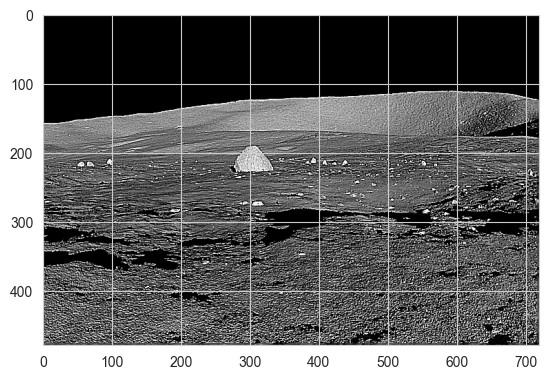

In [86]:
def laplacian(img):
    lap_filter = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

    padded_img = np.pad(img, pad_width=1, mode='constant', constant_values=0)
    new_img = np.zeros_like(img, np.float64)

    for i in range(1, img.shape[0]-2):
      for j in range(1, img.shape[1]-2):
        window = padded_img[i-1:i+2, j-1:j+2]
        new_img[i-1, j-1] = np.sum(window * lap_filter)
    return new_img

lap_img = laplacian(img)
new_img = np.add(lap_img, img)
new_img = np.clip(new_img, 0, 255)
new_img = new_img.astype(np.uint8)
plt.imshow(new_img, cmap='gray')

In [113]:
def connected_component_analysis(binary_image):
    """Performs connected component analysis."""
    num_labels, labels = cv2.connectedComponents(binary_image, connectivity=4)
    return num_labels, labels

_, img_small_rock_b = cv2.threshold(new_img, 80, 255, cv2.THRESH_BINARY_INV)
_, img_large_rock_b = cv2.threshold(new_img, 140, 255, cv2.THRESH_BINARY)

img_large_rock = connected_component_analysis(valid_pixels)
img_small_rock = connected_component_analysis(img_small_rock_b)




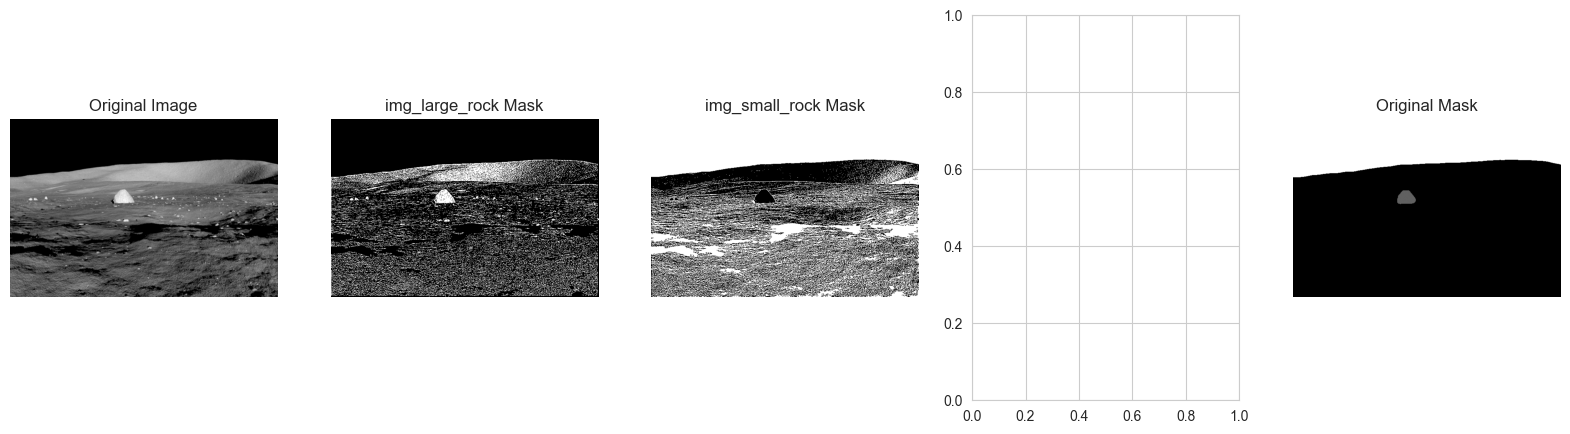

In [100]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

axes[0].imshow(original_image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(img_large_rock_b, cmap='gray')
axes[1].set_title("img_large_rock Mask")
axes[1].axis("off")

axes[2].imshow(img_small_rock_b, cmap='gray')
axes[2].set_title("img_small_rock Mask")
axes[2].axis("off")

axes[4].imshow(ground_truth_mask, cmap='gray')
axes[4].set_title("Original Mask")
axes[4].axis("off")
plt.show()

In [109]:
def compute_accuracy(pred_mask, gt_mask):
    """Compute accuracy between predicted and ground truth masks without binarization."""
    TP_TN = np.sum(pred_mask == gt_mask)  # Pixels where both match
    total_pixels = pred_mask.size  # Total number of pixels
    return TP_TN / total_pixels if total_pixels != 0 else 1.0


def process_dataset(train_images_path, train_masks_path, output_csv):
    """Process all images in the dataset and store results in a DataFrame."""

    results = []

    for filename in os.listdir(train_images_path):
        if filename.endswith(".png"):
            img_path = os.path.join(train_images_path, filename)
            mask_filename = filename.replace(".png", ".png")
            mask_path = os.path.join(train_masks_path, mask_filename)

            if not os.path.exists(mask_path):
                print(f"Mask not found for {filename}, skipping...")
                continue

            img = cv2.imread(img_path, 0)
            if img is None:
                print(f"Failed to read {filename}, skipping...")
                continue

            _, img_small_rock_b = cv2.threshold(new_img, 80, 255, cv2.THRESH_BINARY_INV)
            _, img_large_rock_b = cv2.threshold(new_img, 140, 255, cv2.THRESH_BINARY)

            img_large_rock = connected_component_analysis(valid_pixels)
            img_small_rock = connected_component_analysis(img_small_rock_b)



            img_large_rock = connectivit_8(img, img_large_rock, 1)
            img_small_rock = connectivit_8(img, img_small_rock, 1)


            combined_mask = create_combined_mask(img_large_rock, img_small_rock)


            ground_truth_mask = cv2.imread(mask_path, 0)
            if ground_truth_mask is None:
                print(f"Failed to read mask {mask_filename}, skipping...")
                continue

            dice_score = dice_coefficient(combined_mask, ground_truth_mask)


            accuracy = compute_accuracy(combined_mask, ground_truth_mask)


            print("1")
            results.append({
                "Image": filename,
                "Large": round(cytoplasm_thresh, 2),
                "small": round(nucleus_thresh, 2),
                "Dice_Score": round(dice_score, 4),
                "Accuracy": round(accuracy, 4)
            })

            print(f"{filename}: Dice Score = {dice_score:.4f}, Accuracy = {accuracy:.4f}")

    # Convert to DataFrame and save to CSV
    df_results = pd.DataFrame(results)
    df_results.to_csv(output_csv, index=False)
    return df_results
train_masks_path = "E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Open Lab with Instructions\\dataset\\masks"
output_csv = "E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Open Lab with Instructions\\dataset\\results.csv"

# Example usage
train_images_path = "E:\\2. DIP\\2. LAB\\pythonProject\\Projects\\Open Lab with Instructions\\dataset"


In [110]:

df_train = process_dataset(train_images_path, train_masks_path, output_csv)


Procssing of test Data